In [1]:
! pip uninstall pandas
! pip install geopandas==0.23.4

In [ ]:
!pip install pyshp

In [ ]:
import geopandas as gpd
# Read shp data of Taiwan county 
# 縣市界
County_data = gpd.read_file("C:/Users/Huwalli/OneDrive/文件/GitHub/eduproject/mapdata202301070205/COUNTY_MOI_1090820.shp")
# Display data 顯示前5筆
County_data.head()


,COUNTYID,COUNTYCODE,COUNTYNAME,COUNTYENG,geometry
0,Z,09007,連江縣,Lienchiang County,"MULTIPOLYGON (((119.96445 25.94552, 119.96427 ..."
1,G,10002,宜蘭縣,Yilan County,"MULTIPOLYGON (((121.95971 24.84494, 121.96064 ..."
2,N,10007,彰化縣,Changhua County,"POLYGON ((120.45655 24.20719, 120.48589 24.197..."
3,M,10008,南投縣,Nantou County,"POLYGON ((121.27086 24.23661, 121.27108 24.236..."
4,P,10009,雲林縣,Yunlin County,"MULTIPOLYGON (((120.08108 23.52412, 120.08161 ..."


<AxesSubplot:>

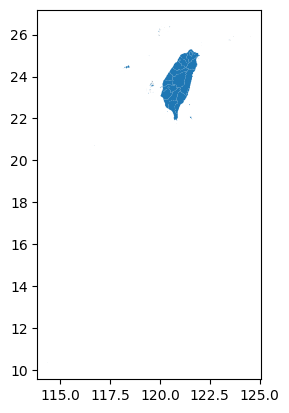

In [ ]:
## plot data
Sample_data = County_data.loc[:, ['COUNTYNAME', 'geometry']]
Sample_data.plot()

<AxesSubplot:>

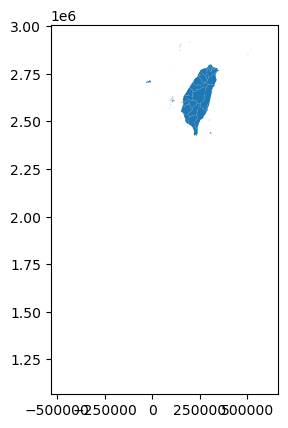

In [ ]:
County_data=County_data.to_crs(epsg=3826)
Sample_data = County_data.loc[:, ['COUNTYNAME', 'geometry']]
Sample_data.plot()

In [ ]:
# 鄉鎮市區界
Town_data = gpd.read_file("C:/Users/Huwalli/OneDrive/文件/GitHub/eduproject/Town_data.csv")
Town_data.head()

,Column1,TOWNID,TOWNCODE,COUNTYNAME,人口,TOWNENG,COUNTYID,COUNTYCODE,geometry
0,0,V02,10014020,臺東縣,1000,Chenggong Township,V,10014,None
1,1,T21,10013210,屏東縣,1001,Jiadong Township,T,10013,None
2,2,P13,10009130,雲林縣,1002,Mailiao Township,P,10009,None
3,3,V11,10014110,臺東縣,1003,Lüdao Township,V,10014,None
4,4,V16,10014160,臺東縣,1004,Lanyu Township,V,10014,None


In [ ]:
Big_Taipei = Town_data[(Town_data['COUNTYNAME']=='臺北市') | (Town_data['COUNTYNAME']=='新北市')]

In [ ]:
import numpy
for i in Big_Taipei['人口'].index:
    Big_Taipei['人口'][i] = numpy.int64(Big_Taipei['人口'][i])

C:\Users\Huwalli\AppData\Local\Temp\ipykernel_2580\2683192056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Big_Taipei['人口'][i] = numpy.int64(Big_Taipei['人口'][i])


In [ ]:
type(Big_Taipei['人口'][152])

numpy.int64

c:\Users\Huwalli\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

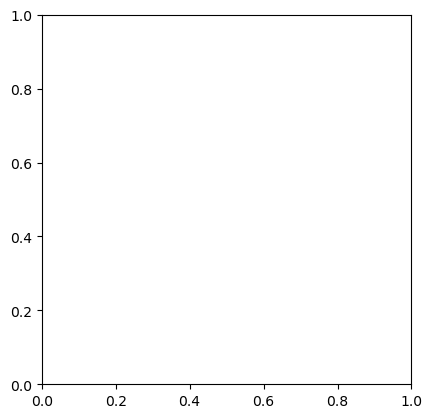

In [ ]:
# add legend
leg_kwds={'title':'人口數',
          'loc': 'upper left',
          'bbox_to_anchor':(1, 1.03),
          'ncol':3}

Big_Taipei.plot(column='人口', cmap = 'RdBu', legend=True, legend_kwds=leg_kwds)

C:\Users\Huwalli\anaconda3\lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


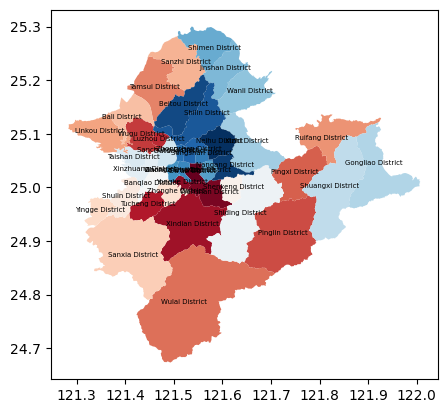

In [ ]:
import matplotlib.pyplot as plt

# add town name label
Big_Taipei['coords'] = Big_Taipei['geometry'].apply(lambda x: x.representative_point().coords[:])
Big_Taipei['coords'] = [coords[0] for coords in Big_Taipei['coords']]

# 绘制图形
Big_Taipei.plot(cmap='RdBu')

# 遍历行，并在图形中添加标注
for idx, row in Big_Taipei.iterrows():
    plt.annotate(text=row['TOWNENG'], xy=row['coords'],
                 horizontalalignment='center', fontsize=5)

# 显示图形
plt.show()